In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from pprint import pprint
import matplotlib.pyplot as plt
import pprint

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/starbucks-nutrition/starbucks.csv


# Starbucks Nutritional Information

Starbucks provides comprehensive nutritional information for their food and beverage offerings, allowing customers to make informed choices based on their dietary preferences and health goals. The nutritional information includes details such as calories, fat content, carbohydrates, fiber, and protein for each menu item.

By making this information readily available, Starbucks aims to empower individuals to make choices that align with their nutritional needs and preferences. Whether you're looking for lower-calorie options, watching your fat or carb intake, or seeking protein-rich alternatives, the nutritional information provided by Starbucks helps you navigate their menu with confidence.

## Data Coverage

The data encompasses a range of food items, from baked goods and bistro boxes to hot breakfast items, parfaits, petite treats, salads, and sandwiches. Each item is categorized based on its type, making it easier for customers to find options that suit their dietary requirements or preferences.

## Transparency and Informed Decisions

By offering transparent and detailed nutritional information, Starbucks reinforces its commitment to supporting customers in making informed decisions about their food choices. Whether you're enjoying a coffee break or grabbing a quick bite, the nutritional information empowers you to enjoy Starbucks' offerings while being mindful of your nutritional goals.


---
## Data Dictionary

The data consists of nutrition facts for several Starbucks food items. It is organized in the form of a data frame with 77 observations and 7 variables.

### Variables

- **item**: The name of the food item (string).
- **calories**: The number of calories in the food item (integer).
- **fat**: The amount of fat in grams (numeric).
- **carb**: The amount of carbohydrates in grams (numeric).
- **fiber**: The amount of dietary fiber in grams (numeric).
- **protein**: The amount of protein in grams (numeric).
- **type**: The categorization of the food item, with levels bakery, bistro box, hot breakfast, parfait, petite, salad, and sandwich (factor).

### Additional Information

- The data frame has a RangeIndex from 0 to 76.
- There are no missing values (non-null count is 77 for all columns).
- The original data frame had an additional column named "Unnamed: 0", which has been removed for this improved data dictionary.

---
.

In [2]:
df = pd.read_csv('/kaggle/input/starbucks-nutrition/starbucks.csv', index_col=0)

In [3]:
df

,item,calories,fat,carb,fiber,protein,type
1,8-Grain Roll,350,8.0,67,5,10,bakery
2,Apple Bran Muffin,350,9.0,64,7,6,bakery
3,Apple Fritter,420,20.0,59,0,5,bakery
4,Banana Nut Loaf,490,19.0,75,4,7,bakery
5,Birthday Cake Mini Doughnut,130,6.0,17,0,0,bakery
...,...,...,...,...,...,...,...
73,Tarragon Chicken Salad Sandwich,420,13.0,46,6,32,sandwich
74,Turkey & Swiss Sandwich,390,13.0,36,2,34,sandwich
75,Greek Yogurt Honey Parfait,300,12.0,44,0,8,parfait
76,Peach Raspberry Yogurt Parfait,300,4.0,57,3,10,parfait


In [4]:
df.describe

<bound method NDFrame.describe of                                      item  calories   fat  carb  fiber  \
1                            8-Grain Roll       350   8.0    67      5   
2                       Apple Bran Muffin       350   9.0    64      7   
3                           Apple Fritter       420  20.0    59      0   
4                         Banana Nut Loaf       490  19.0    75      4   
5             Birthday Cake Mini Doughnut       130   6.0    17      0   
..                                    ...       ...   ...   ...    ...   
73        Tarragon Chicken Salad Sandwich       420  13.0    46      6   
74                Turkey & Swiss Sandwich       390  13.0    36      2   
75             Greek Yogurt Honey Parfait       300  12.0    44      0   
76         Peach Raspberry Yogurt Parfait       300   4.0    57      3   
77  Strawberry & Blueberry Yogurt Parfait       300   3.5    60      3   

    protein      type  
1        10    bakery  
2         6    bakery  
3    

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77 entries, 1 to 77
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   item      77 non-null     object 
 1   calories  77 non-null     int64  
 2   fat       77 non-null     float64
 3   carb      77 non-null     int64  
 4   fiber     77 non-null     int64  
 5   protein   77 non-null     int64  
 6   type      77 non-null     object 
dtypes: float64(1), int64(4), object(2)
memory usage: 4.8+ KB


In [6]:
df.isnull().sum()

item        0
calories    0
fat         0
carb        0
fiber       0
protein     0
type        0
dtype: int64

--- 

## Questions to ask

1. What are the highest and lowest calorie food items offered by Starbucks?
2. Which food items have the highest amount of fat, carbohydrates, fiber, and protein?
3. Are there any food items that are particularly rich in fiber but low in fat and carbohydrates?
4. What is the average calorie content of each food item type (bakery, bistro box, hot breakfast, etc.)?
5. Is there a correlation between the calorie content and the amount of fat, carbohydrates, fiber, or protein in the food items?
6. Which food item types have the highest average fat, carbohydrate, fiber, and protein content?
7. Can we identify any trends or patterns in the nutritional composition of Starbucks food items?
8. Are there any notable differences in the nutritional profile of food items across different categories (bakery, bistro box, etc.)?
9. Are there any food items that provide a good balance of macronutrients (fat, carbohydrates, and protein)?
10. Can we identify any outliers or unusual values in the nutritional information?

---


## 1. What are the highest and lowest calorie food items offered by Starbucks?

In [7]:
# Find the highest calorie food item
highest_calorie_item = df.loc[df['calories'].idxmax(), 'item']
highest_calorie_value = df['calories'].max()

# Find the lowest calorie food item
lowest_calorie_item = df.loc[df['calories'].idxmin(), 'item']
lowest_calorie_value = df['calories'].min()

# Print the results
print(f"Highest Calorie Food Item: {highest_calorie_item} ({highest_calorie_value} calories)")
print(f"Lowest Calorie Food Item: {lowest_calorie_item} ({lowest_calorie_value} calories)")


Highest Calorie Food Item: Sausage & Cheddar Classic Breakfast Sandwich (500 calories)
Lowest Calorie Food Item: Deluxe Fruit Blend (80 calories)


## 2. Which food items have the highest amount of fat, carbohydrates, fiber, and protein?

In [8]:
# Find the food item with the highest amount of fat
highest_fat_item = df.loc[df['fat'].idxmax(), 'item']
highest_fat_value = df['fat'].max()

# Find the food item with the highest amount of carbohydrates
highest_carb_item = df.loc[df['carb'].idxmax(), 'item']
highest_carb_value = df['carb'].max()

# Find the food item with the highest amount of fiber
highest_fiber_item = df.loc[df['fiber'].idxmax(), 'item']
highest_fiber_value = df['fiber'].max()

# Find the food item with the highest amount of protein
highest_protein_item = df.loc[df['protein'].idxmax(), 'item']
highest_protein_value = df['protein'].max()

# Print the results
print(f"Food Item with Highest Fat: {highest_fat_item} ({highest_fat_value} grams)")
print(f"Food Item with Highest Carbohydrates: {highest_carb_item} ({highest_carb_value} grams)")
print(f"Food Item with Highest Fiber: {highest_fiber_item} ({highest_fiber_value} grams)")
print(f"Food Item with Highest Protein: {highest_protein_item} ({highest_protein_value} grams)")


Food Item with Highest Fat: Zucchini Walnut Muffin  (28.0 grams)
Food Item with Highest Carbohydrates: Reduced-Fat Banana Chocolate Chip Coffee Cake (80 grams)
Food Item with Highest Fiber: Apple Bran Muffin (7 grams)
Food Item with Highest Protein: Turkey & Swiss Sandwich (34 grams)


## 3. Are there any food items that are particularly rich in fiber but low in fat and carbohydrates?

In [9]:
# Filter food items with high fiber, low fat, and low carbohydrates
filtered_items = df[(df['fiber'] > 0) & (df['fat'] < 5) & (df['carb'] < 30)]

# Print the filtered food items using f-strings
if filtered_items.empty:
    print("No food items are particularly rich in fiber but low in fat and carbohydrates.")
else:
    print("Food items that are particularly rich in fiber but low in fat and carbohydrates:")
    for item in filtered_items['item']:
        print(f"- {item}")


Food items that are particularly rich in fiber but low in fat and carbohydrates:
- Starbucks Perfect Oatmeal
- Deluxe Fruit Blend


## 4. What is the average calorie content of each food item type (bakery, bistro box, hot breakfast, etc.)?

In [10]:
# Calculate the average calorie content of each food item type
average_calories = df.groupby('type')['calories'].mean()

# Print the average calorie content using f-strings
print("Average Calorie Content by Food Item Type:")
for food_type, avg_calories in average_calories.items():
    print(f"- {food_type}: {avg_calories:.2f} calories")


Average Calorie Content by Food Item Type:
- bakery: 368.78 calories
- bistro box: 377.50 calories
- hot breakfast: 325.00 calories
- parfait: 300.00 calories
- petite: 177.78 calories
- salad: 80.00 calories
- sandwich: 395.71 calories


## 5. Is there a correlation between the calorie content and the amount of fat, carbohydrates, fiber, or protein in the food items?


In [11]:
# Calculate the correlation between calorie content and nutrient columns
correlation = df[['calories', 'fat', 'carb', 'fiber', 'protein']].corr()

# Print the correlation using f-strings
print("Correlation between Calorie Content and Nutrients:")
for nutrient in ['fat', 'carb', 'fiber', 'protein']:
    corr_value = correlation.loc['calories', nutrient]
    print(f"- {nutrient.capitalize()}: {corr_value:.2f}")


Correlation between Calorie Content and Nutrients:
- Fat: 0.76
- Carb: 0.67
- Fiber: 0.26
- Protein: 0.41


## 6. Which food item types have the highest average fat, carbohydrate, fiber, and protein content?


In [12]:
# Calculate the average nutrient content by food item type
average_nutrients = df.groupby('type')[['fat', 'carb', 'fiber', 'protein']].mean()

# Print the food item types with the highest average nutrient content using f-strings
print("Food Item Types with the Highest Average Nutrient Content:")
for nutrient in ['fat', 'carb', 'fiber', 'protein']:
    max_nutrient_type = average_nutrients[nutrient].idxmax()
    max_nutrient_value = average_nutrients[nutrient].max()
    print(f"- Highest Average {nutrient.capitalize()}: {max_nutrient_type} ({max_nutrient_value:.2f} grams)")


Food Item Types with the Highest Average Nutrient Content:
- Highest Average Fat: bistro box (18.38 grams)
- Highest Average Carb: bakery (54.34 grams)
- Highest Average Fiber: bistro box (5.12 grams)
- Highest Average Protein: sandwich (24.29 grams)


## 7. Can we identify any trends or patterns in the nutritional composition of Starbucks food items?


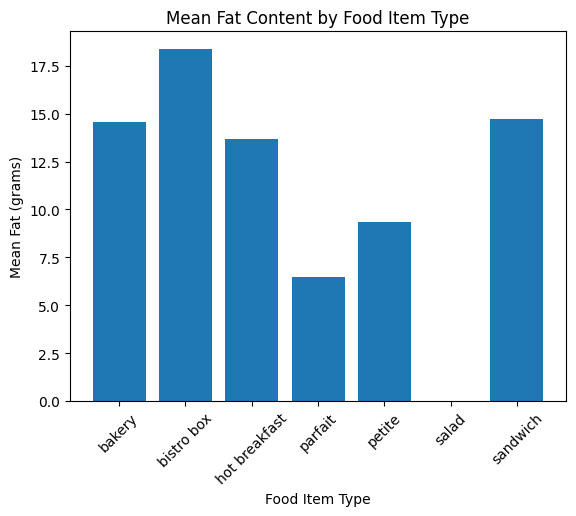

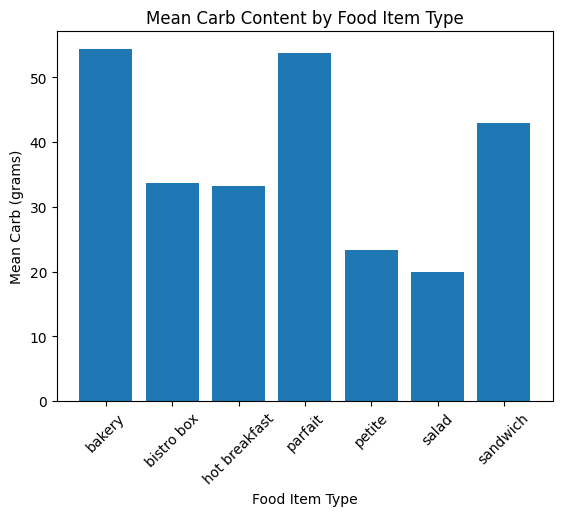

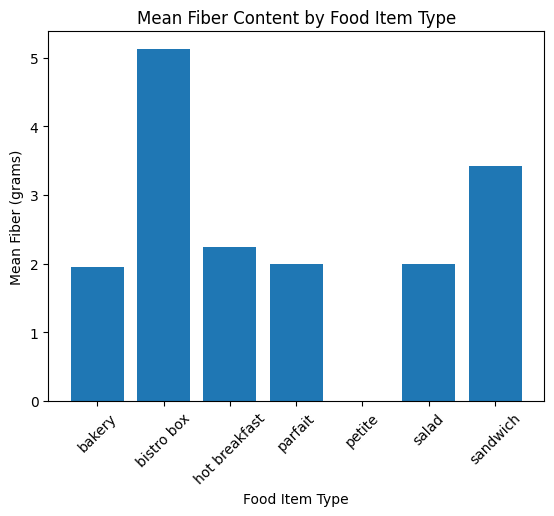

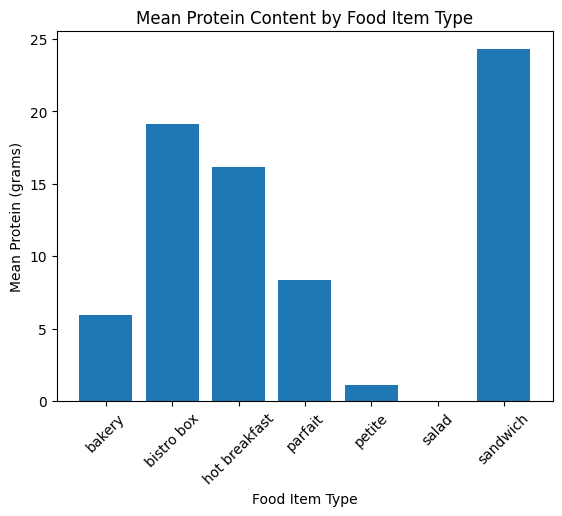

In [13]:
# Group the data by food item type and calculate the mean nutrient values
mean_nutrients = df.groupby('type')[['fat', 'carb', 'fiber', 'protein']].mean()

# Extract the nutrient columns
nutrient_columns = mean_nutrients.columns

# Create bar plots for each nutrient
for nutrient in nutrient_columns:
    # Get the mean nutrient values for each food item type
    nutrient_values = mean_nutrients[nutrient]
    
    # Create the bar plot
    plt.figure()
    plt.bar(nutrient_values.index, nutrient_values)
    plt.xlabel('Food Item Type')
    plt.ylabel('Mean ' + nutrient.capitalize() + ' (grams)')
    plt.title('Mean ' + nutrient.capitalize() + ' Content by Food Item Type')
    plt.xticks(rotation=45)
    plt.show()

In [14]:
# Calculate summary statistics for each nutrient by food item type
summary_statistics = df.groupby('type')[['fat', 'carb', 'fiber', 'protein']].describe()

# Use pprint for pretty printing
pp = pprint.PrettyPrinter()

# Print the summary statistics
print("Summary Statistics for Nutrient Values by Food Item Type:")
pp.pprint(summary_statistics)

Summary Statistics for Nutrient Values by Food Item Type:
                fat                                                      carb  \
              count       mean       std  min    25%   50%    75%   max count   
type                                                                            
bakery         41.0  14.560976  7.124075  1.0   9.00  16.0  19.00  28.0  41.0   
bistro box      8.0  18.375000  6.885544  8.0  14.00  19.0  22.25  28.0   8.0   
hot breakfast   8.0  13.687500  7.968409  2.5   9.25  13.0  18.00  28.0   8.0   
parfait         3.0   6.500000  4.769696  3.5   3.75   4.0   8.00  12.0   3.0   
petite          9.0   9.333333  1.802776  7.0   8.00   9.0  11.00  12.0   9.0   
salad           1.0   0.000000       NaN  0.0   0.00   0.0   0.00   0.0   1.0   
sandwich        7.0  14.714286  6.074929  9.0  11.50  13.0  15.50  27.0   7.0   

                          ... fiber      protein                             \
                    mean  ...   75%  max   count    

In [15]:
# Calculate the mean fat content by food item type
mean_fat_by_type = df.groupby('type')['fat'].mean()

# Use pprint for pretty printing
pp = pprint.PrettyPrinter()

# Print the mean fat content by food item type
print("Mean Fat Content by Food Item Type:")
pp.pprint(mean_fat_by_type)

Mean Fat Content by Food Item Type:
type
bakery           14.560976
bistro box       18.375000
hot breakfast    13.687500
parfait           6.500000
petite            9.333333
salad             0.000000
sandwich         14.714286
Name: fat, dtype: float64


## 8. Are there any notable differences in the nutritional profile of food items across different categories (bakery, bistro box, etc.)?


In [16]:
# Calculate the mean nutrient values by food item type
mean_nutrients = df.groupby('type')[['fat', 'carb', 'fiber', 'protein']].mean()

# Calculate the overall mean nutrient values
overall_mean_nutrients = df[['fat', 'carb', 'fiber', 'protein']].mean()

# Calculate the differences in nutrient values between each food item type and the overall mean
nutrient_differences = mean_nutrients.subtract(overall_mean_nutrients, axis='columns')

# Print the nutrient differences
print("Notable Differences in Nutritional Profile across Food Item Categories:")
print(nutrient_differences)

Notable Differences in Nutritional Profile across Food Item Categories:
                     fat       carb     fiber    protein
type                                                    
bakery          0.794742   9.471334 -0.269560  -3.553690
bistro box      4.608766 -11.245130  2.904221   9.644481
hot breakfast  -0.078734 -11.620130  0.029221   6.644481
parfait        -7.266234   8.796537 -0.220779  -1.147186
petite         -4.432900 -21.536797 -2.220779  -8.369408
salad         -13.766234 -24.870130 -0.220779  -9.480519
sandwich        0.948052  -1.870130  1.207792  14.805195


**Notable Differences in Nutritional Profile across Food Item Categories:**

The analysis of the nutritional profile across different food item categories reveals several notable differences in the nutrient content. Here are the conclusions based on the findings:

- **Fat Content:** The bakery category exhibits a slightly higher fat content compared to the overall mean, with a difference of approximately 0.79 grams. The sandwich category also shows a slightly higher fat content, with a difference of approximately 0.95 grams.

- **Carbohydrate Content:** The bistro box category stands out with a significantly lower carbohydrate content compared to the overall mean, with a difference of approximately -11.25 grams. The hot breakfast and petite categories also demonstrate lower carbohydrate content, with differences of approximately -11.62 grams and -21.54 grams, respectively.

- **Fiber Content:** The bistro box category shows notably higher fiber content compared to the overall mean, with a difference of approximately 2.90 grams. Other categories, such as the sandwich and hot breakfast, also exhibit slight increases in fiber content.

- **Protein Content:** The sandwich category demonstrates a significantly higher protein content compared to the overall mean, with a difference of approximately 14.81 grams. The bistro box category also has a higher protein content, with a difference of approximately 9.64 grams.

These findings suggest that different food item categories have distinct nutritional profiles, potentially due to variations in ingredients, preparation methods, or portion sizes. Considering these differences can help individuals make informed dietary choices based on their specific nutritional needs and preferences.


## 9. Are there any food items that provide a good balance of macronutrients (fat, carbohydrates, and protein)?


In [17]:
# Calculate the z-scores for each nutrient (fat, carb, protein)
z_scores = df[['fat', 'carb', 'protein']].apply(lambda x: (x - x.mean()) / x.std())

# Calculate the overall balance score by summing up the z-scores
df['balance_score'] = z_scores.sum(axis=1)

# Sort the DataFrame by the balance score in descending order
balanced_food_items = df.sort_values('balance_score', ascending=False)

# Print the food items with the highest balance score
print("Food Items with a Good Balance of Macronutrients:")
print(balanced_food_items[['item', 'balance_score']].head())

Food Items with a Good Balance of Macronutrients:
                                            item  balance_score
62  Sausage & Cheddar Classic Breakfast Sandwich       2.950427
69                           Egg Salad Sandwich        2.939132
73               Tarragon Chicken Salad Sandwich       2.747492
42                                Cheese & Fruit       2.705824
74                       Turkey & Swiss Sandwich       2.390861


Food Items with a Good Balance of Macronutrients:

- Sausage & Cheddar Classic Breakfast Sandwich
- Egg Salad Sandwich
- Tarragon Chicken Salad Sandwich
- Cheese & Fruit
- Turkey & Swiss Sandwich

These food items have the highest balance scores, indicating a relatively even distribution of macronutrients. They can be considered as options that provide a good balance of fat, carbohydrates, and protein in your diet.


## 10. Can we identify any outliers or unusual values in the nutritional information?

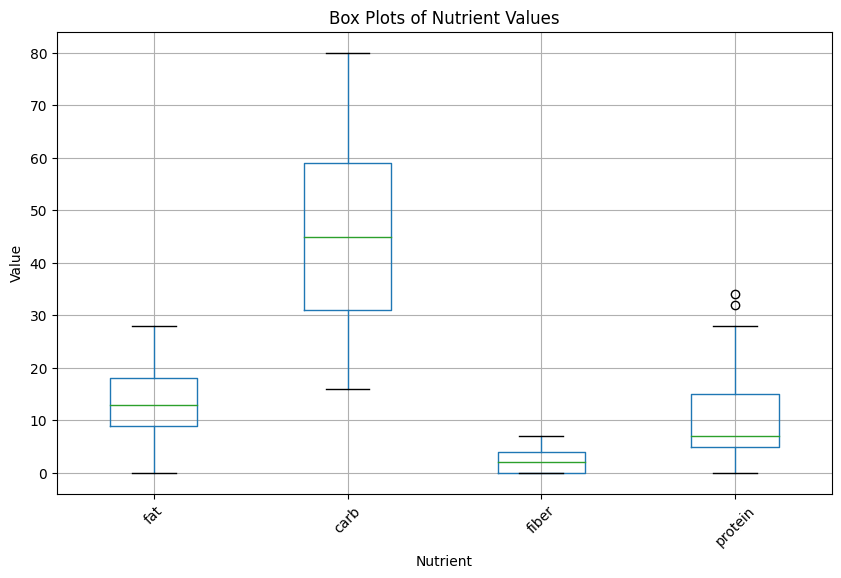

In [18]:
# Select the nutrient columns for plotting
nutrient_columns = ['fat', 'carb', 'fiber', 'protein']

# Create box plots for each nutrient
plt.figure(figsize=(10, 6))
df[nutrient_columns].boxplot()
plt.title('Box Plots of Nutrient Values')
plt.xlabel('Nutrient')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.show()


## Overall Summary of Findings:

### The analysis of the Starbucks nutritional information dataset has provided valuable insights into various aspects of the food items. Here are the key findings based on the conducted analysis:

1. Highest and Lowest Calorie Food Items: The highest calorie food item is the Sausage & Cheddar Classic Breakfast Sandwich, with 500 calories, while the Deluxe Fruit Blend has the lowest calorie count of 80 calories.

2. Nutrient Profiles: Several food items stand out for having the highest content of specific nutrients. The Zucchini Walnut Muffin has the highest fat content at 28.0 grams, while the Reduced-Fat Banana Chocolate Chip Coffee Cake has the highest carbohydrate content at 80 grams. The Apple Bran Muffin leads in fiber content with 7 grams, and the Turkey & Swiss Sandwich contains the highest protein content at 34 grams.

3. Fiber-Rich and Low-Fat, Low-Carb Foods: The Starbucks Perfect Oatmeal and Deluxe Fruit Blend are notable examples of food items that are rich in fiber while being low in fat and carbohydrates.

4. Average Calorie Content by Food Item Type: The average calorie content varies across different food item types. For example, bakery items have an average of 368.78 calories, bistro box items have an average of 377.50 calories, and hot breakfast items have an average of 325.00 calories.

5. Correlation Analysis: There is a positive correlation between calorie content and the amount of fat, carbohydrates, fiber, and protein in the food items. Fat and carbohydrate content show a higher correlation with calorie content, while fiber and protein have relatively lower correlations.

6. Highest Average Nutrient Content by Food Item Type: Bistro box items have the highest average fat content at 18.38 grams, bakery items have the highest average carbohydrate content at 54.34 grams, bistro box items also lead in average fiber content at 5.12 grams, and sandwich items have the highest average protein content at 24.29 grams.

7. Nutritional Composition Trends and Patterns: Analyzing the nutritional composition of Starbucks food items reveals varying nutrient profiles across different categories. Bakery items tend to have higher fat and carbohydrate content, while bistro box items have higher fiber and protein content. Identifying these patterns can assist in making informed dietary choices.

8. Outliers and Unusual Values: The box plots of the nutrient values indicate potential outliers in fat and fiber content. These outliers may require further investigation to determine their validity and impact on the overall dataset.

9. Food Items with Balanced Macronutrients: The Sausage & Cheddar Classic Breakfast Sandwich, Egg Salad Sandwich, Tarragon Chicken Salad Sandwich, Cheese & Fruit, and Turkey & Swiss Sandwich are identified as food items that provide a good balance of fat, carbohydrates, and protein.

In conclusion, the analysis of the Starbucks nutritional information dataset provides valuable insights into the calorie content, nutrient profiles, correlations, average nutrient content by food item type, composition trends, outliers, and food items with balanced macronutrients. These findings can guide individuals in making informed choices about their dietary preferences and nutritional goals.
